# 📈 Cryptocurrency Volatility Prediction – EDA

## 🔄 Machine Learning Project Life Cycle
1. **Understanding the Problem Statement**  
2. **Data Collection**  
3. **Data Cleaning**  
4. **Exploratory Data Analysis (EDA)**  
5. **Data Preprocessing**  
6. **Feature Engineering**  
7. **Model Training & Evaluation**  
8. **Model Optimization (Hyperparameter Tuning)**  
9. **Model Deployment**

---

##  📝 1 Problem Statement
Cryptocurrency markets are highly volatile, and predicting volatility is crucial for traders and investors.  
Volatility refers to the degree of variation in the price of a cryptocurrency over time.  
Accurate volatility forecasting helps in:  
- Risk management  
- Portfolio allocation  
- Developing trading strategies  

In this project, we aim to build a machine learning model that predicts the **7-day forward realized volatility** of cryptocurrencies based on historical OHLC (Open, High, Low, Close), Volume, and MarketCap data, along with engineered features.

---

## 📊 Dataset Overview
- **Features available:**
  - `open` → Opening price  
  - `high` → Highest price of the day  
  - `low` → Lowest price of the day  
  - `close` → Closing price  
  - `volume` → Trading volume  
  - `marketCap` → Market capitalization  
  - `timestamp` → Original timestamp  
  - `crypto_name` → Name of the cryptocurrency  
  - `date` → Converted date column  

- **Engineered Features:**
  - `log_price` → Log of closing price  
  - `log_return` → Logarithmic return  
  - `vol_7d`, `vol_30d` → Rolling volatility (7-day, 30-day)  
  - `ma_7`, `ma_30` → Moving averages  
  - `liquidity` → Volume / MarketCap ratio  
  - `tr`, `atr_14` → True Range & Average True Range  

- **Target Variable:**
  - `vol_7d_target_next` → Realized volatility for the next 7 days  

---


## 📂 2 Dataset Source
The dataset is stored locally in this repository under:
[data/crypto_prices.csv](data/crypto_prices.csv)

Original source: Yahoo Finance (historical cryptocurrency OHLCV data).


In [118]:

# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Optional: set plotting style
sns.set(style="whitegrid")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [63]:
import os
# Check current working directory
print("Current working directory:", os.getcwd())

# Check files in data folder
print("Files in data folder:", os.listdir('../data')) 

# Load dataset
crypto = pd.read_csv('../data/crypto_prices.csv') 
crypto.head()



Current working directory: /Users/macfreaks/crypto_volatility/notebooks
Files in data folder: ['crypto_prices.csv']


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [64]:
crypto.dtypes

Unnamed: 0       int64
open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
date            object
dtype: object

In [65]:
crypto.info() ,crypto.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


(None, (72946, 10))

In [ ]:
crypto.describe()  # for numeric columns summary of statistics


,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [67]:
crypto.columns


Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')

## 3. EXPLORING DATA

In [68]:
# Remove unnecessary columns (like Unnamed: 0):

crypto = crypto.drop(columns=['Unnamed: 0'])


In [69]:
crypto.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


- **Let's convert the datetime column to pandas datetime format**

In [73]:
# Convert column types (e.g., date/time):
crypto['timestamp'] = pd.to_datetime(crypto['timestamp'])
crypto['date'] = pd.to_datetime(crypto['date'])


In [ ]:
#let's check the datatype
crypto.dtypes

open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
marketCap                  float64
timestamp      datetime64[ns, UTC]
crypto_name                 object
date                datetime64[ns]
dtype: object

In [70]:
## check for duplicated records
crypto.duplicated().sum()


0

In [ ]:
# Check for missing values and duplicates:

crypto.isnull().sum()
crypto.duplicated().sum()

0

##### No missing values found

In [30]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   open         72946 non-null  float64            
 1   high         72946 non-null  float64            
 2   low          72946 non-null  float64            
 3   close        72946 non-null  float64            
 4   volume       72946 non-null  float64            
 5   marketCap    72946 non-null  float64            
 6   timestamp    72946 non-null  datetime64[ns, UTC]
 7   crypto_name  72946 non-null  object             
 8   date         72946 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), object(1)
memory usage: 5.0+ MB


In [113]:
crypto['crypto_name'].value_counts()

crypto_name
Bitcoin                  3248
Litecoin                 3248
XRP                      3157
Dogecoin                 3024
Monero                   2866
Stellar                  2791
Tether                   2582
Ethereum                 2424
Ethereum Classic         2072
Basic Attention Token    1760
EOS                      1730
Bitcoin Cash             1708
BNB                      1706
TRON                     1656
Decentraland             1652
Chainlink                1649
Cardano                  1638
Maker                    1605
Filecoin                 1565
Theta Network            1530
Huobi Token              1513
Ravencoin                1478
Tezos                    1365
VeChain                  1332
Quant                    1325
USD Coin                 1266
Cronos                   1199
Wrapped Bitcoin          1152
Cosmos                   1109
Polygon                  1064
OKB                      1062
UNUS SED LEO             1041
Algorand                 101

## Univariate Analysis

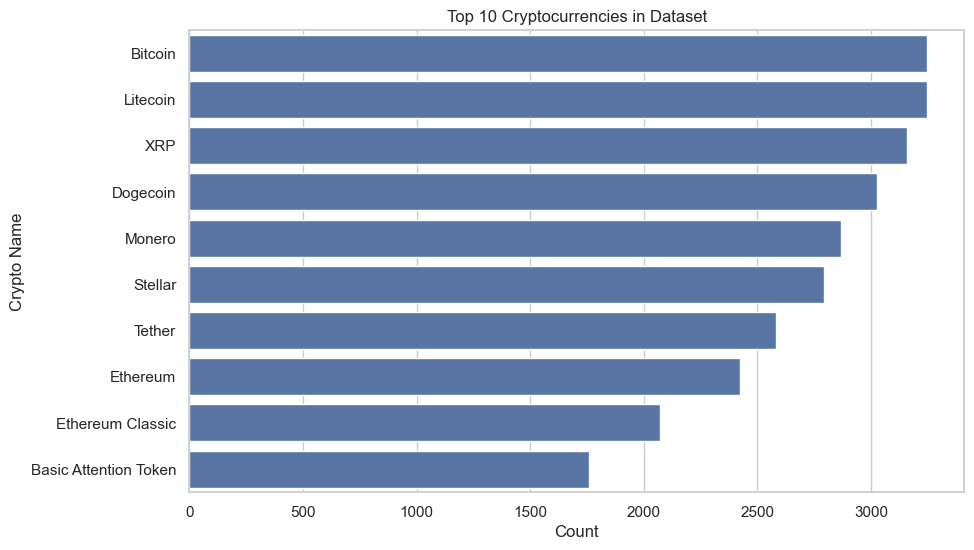

In [78]:

top_n = 10
plt.figure(figsize=(10,6))
sns.countplot(
    y="crypto_name",
    data=df[df["crypto_name"].isin(df["crypto_name"].value_counts().nlargest(top_n).index)],
    order=df["crypto_name"].value_counts().nlargest(top_n).index
)
plt.title(f"Top {top_n} Cryptocurrencies in Dataset")
plt.xlabel("Count")
plt.ylabel("Crypto Name")
plt.show()


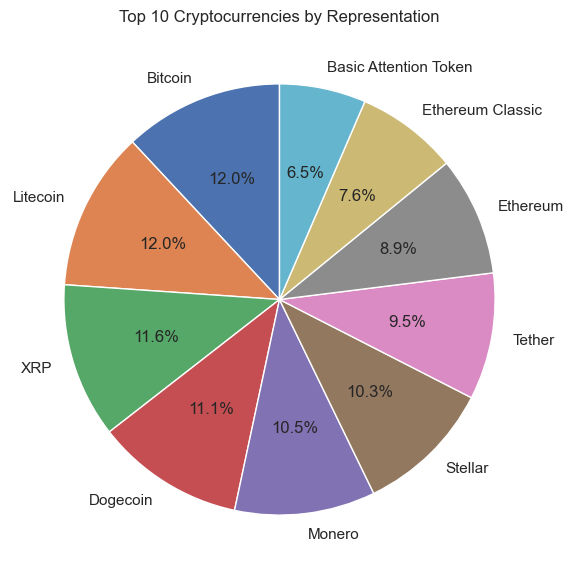

In [97]:

df["crypto_name"].value_counts().nlargest(10).plot(
    kind="pie", autopct="%1.1f%%", figsize=(7,7), startangle=90
)
plt.ylabel("")
plt.title("Top 10 Cryptocurrencies by Representation")
plt.show()


#### Interpretation (for Top 10 cryptos)
- The dataset contains multiple cryptocurrencies, but the distribution is heavily imbalanced.
- The Top 10 coins dominate the dataset, with Bitcoin (BTC) and Ethereum (ETH) having the highest number of records.
- This ensures that the model will learn more stable patterns for major assets, while smaller cryptocurrencies may have limited representation, potentially leading to less reliable predictions for them.
- The pie chart further highlights that a few dominant cryptos make up the majority of the dataset, which reflects their real-world market dominance.

In [98]:
crypto['close'].min(), crypto['close'].max()


(8.292e-11, 67566.8300878775)

In [102]:
crypto.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05 23:59:59.999000+00:00,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05 23:59:59.999000+00:00,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06 23:59:59.999000+00:00,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06 23:59:59.999000+00:00,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07 23:59:59.999000+00:00,Bitcoin,2013-05-07


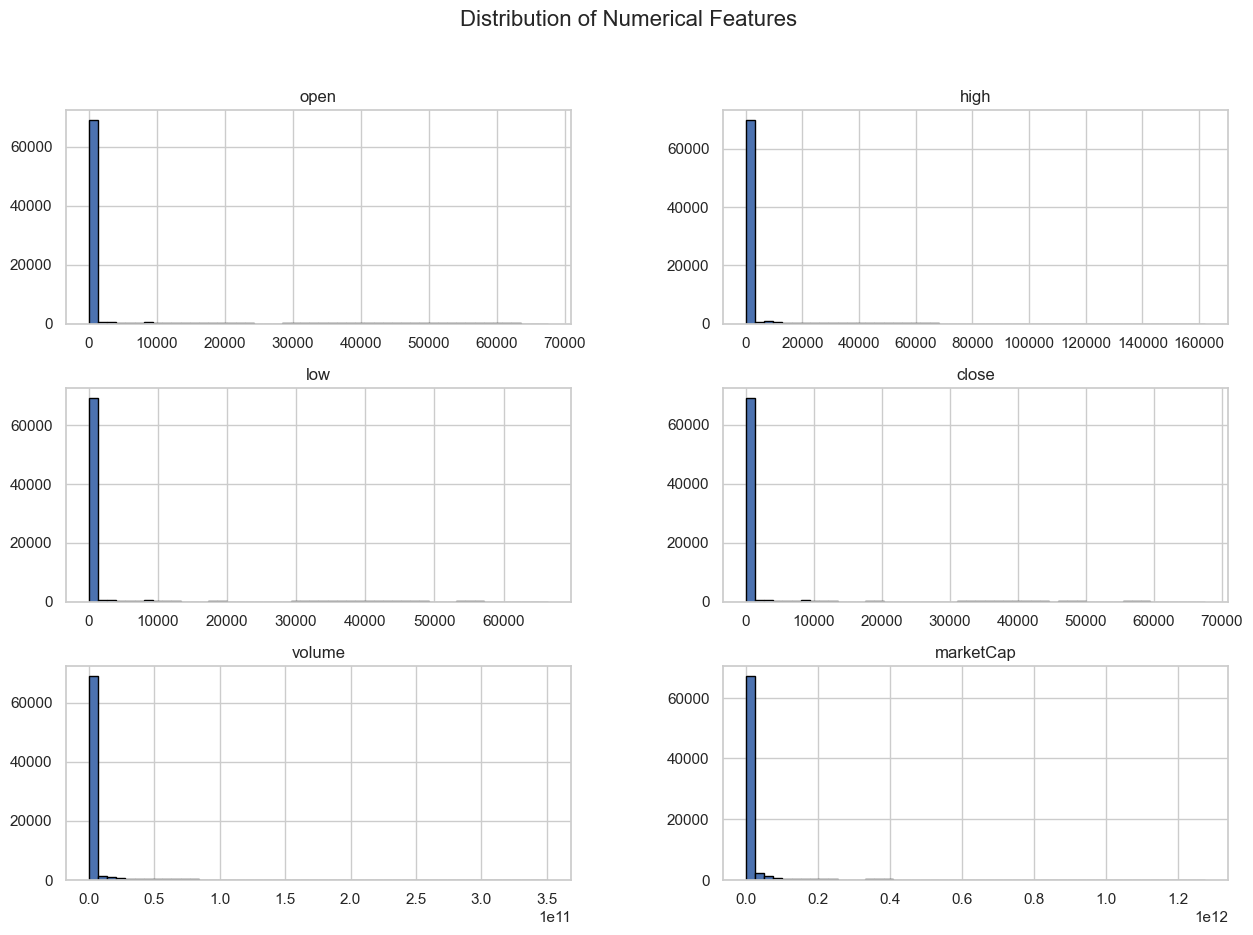

In [110]:
num_cols = ["open", "high", "low", "close", "volume", "marketCap"]

df[num_cols].hist(figsize=(15,10), bins=50, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


#### Interpretation
- The numerical variables (open, high, low, close) show long right-tailed distributions, which is expected in financial time-series data since prices and market capitalization grow over time.
- Features like volume and marketCap are heavily skewed, with many small values and a few extreme outliers (large trading days).
- Boxplots confirm the presence of outliers, which is common in crypto data due to sudden spikes in trading activity.
- This suggests that scaling and log-transformations (already done for some features like log_price) are helpful for stabilizing variance before modeling.

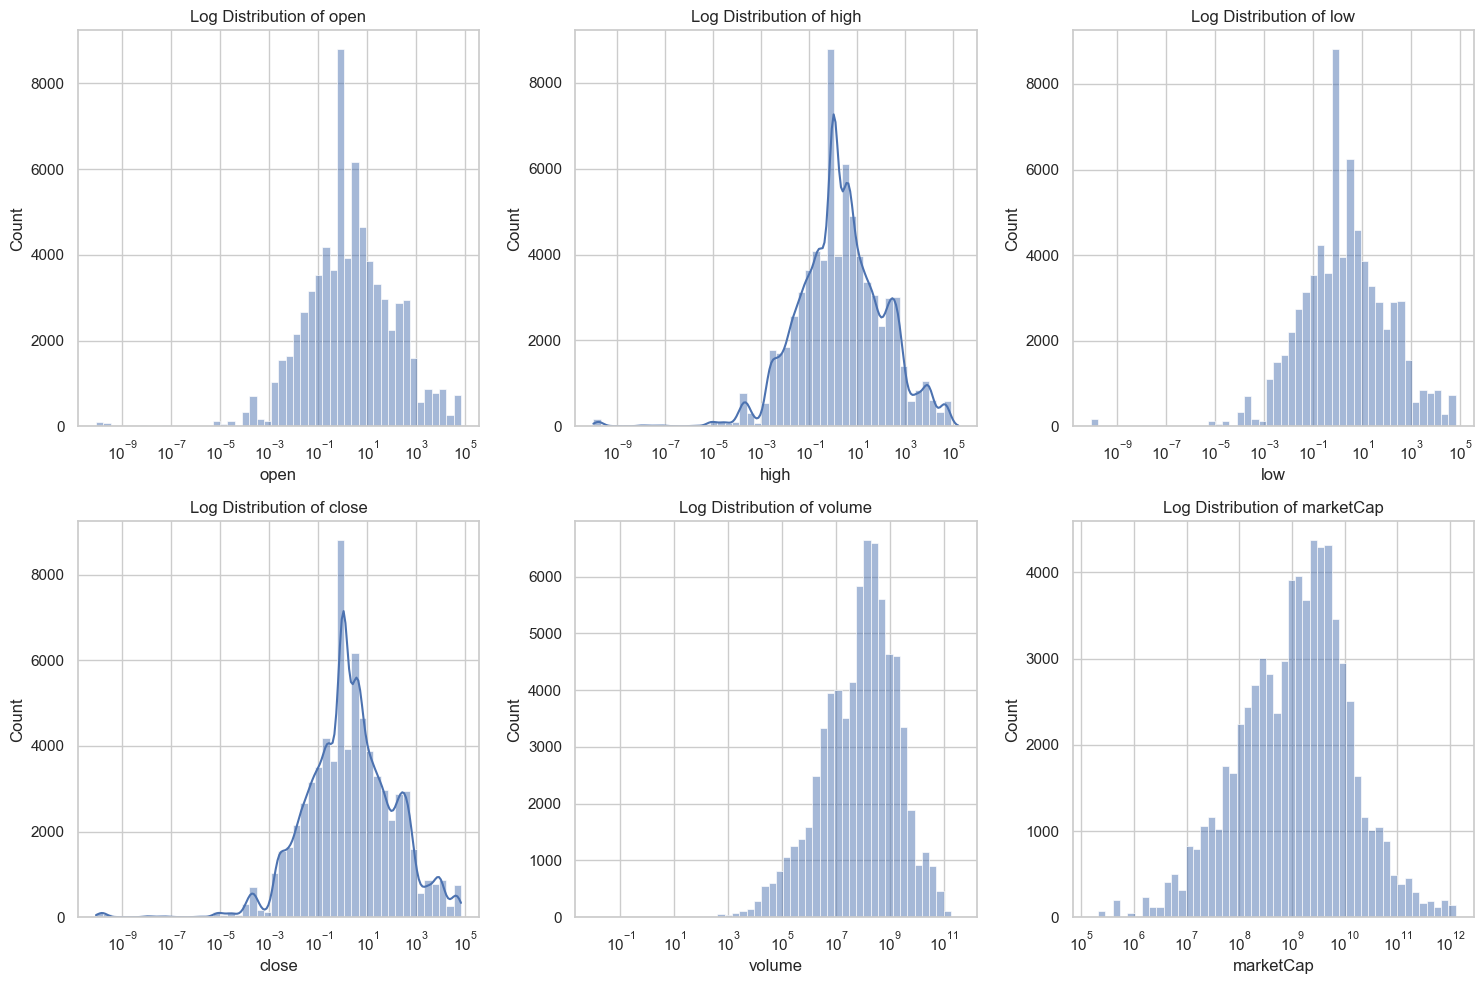

In [106]:
num_cols = ["open", "high", "low", "close", "volume", "marketCap"]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], bins=50, kde=True, log_scale=True)
    plt.title(f"Log Distribution of {col}")
plt.tight_layout()
plt.show()


#### Interpretation for Log Histograms

- After applying a log transformation to the numerical features (open, high, low, close, volume, marketCap), the distributions appear more symmetrical and centered compared to the raw histograms.
- This confirms that the raw features were heavily right-skewed due to extreme market events, but log scaling reduces the impact of outliers and highlights the relative variation across different orders of magnitude.
- In particular, volume and marketCap show long tails in raw form but become approximately bell-shaped under log transformation, making them more suitable for machine learning models.

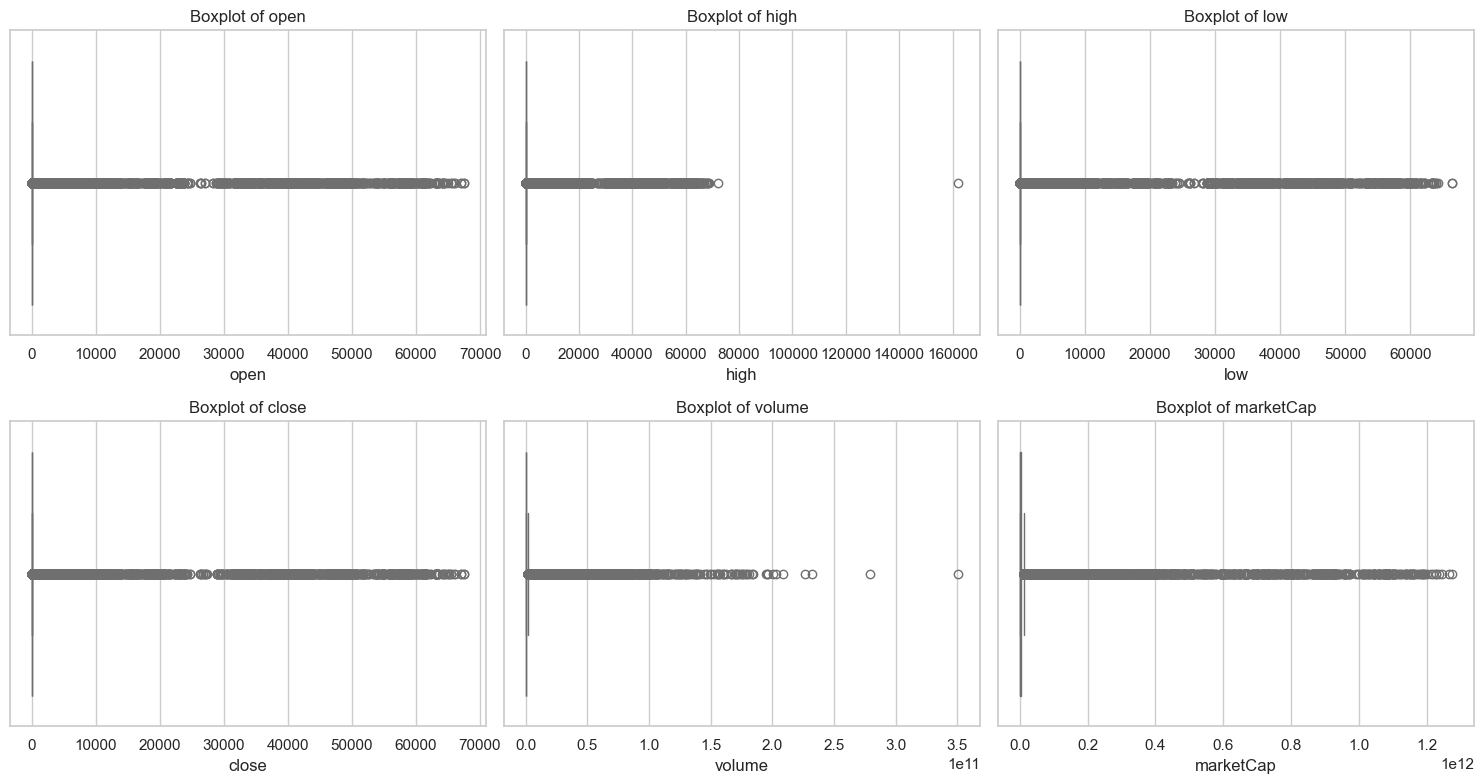

In [109]:
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


#### Interpretation (for Raw Boxplots)

- The boxplots reveal a large number of extreme values (outliers) across all numerical features such as close, volume, and marketCap.
- These outliers represent sudden spikes or crashes in cryptocurrency prices and trading activity, which are typical in volatile financial markets.
- Unlike in other domains where outliers may represent errors or noise, here they are genuine market events and must be retained.
- However, their presence reinforces the need for scaling/log transformation, since unscaled features would allow extreme values to dominate the learning process.

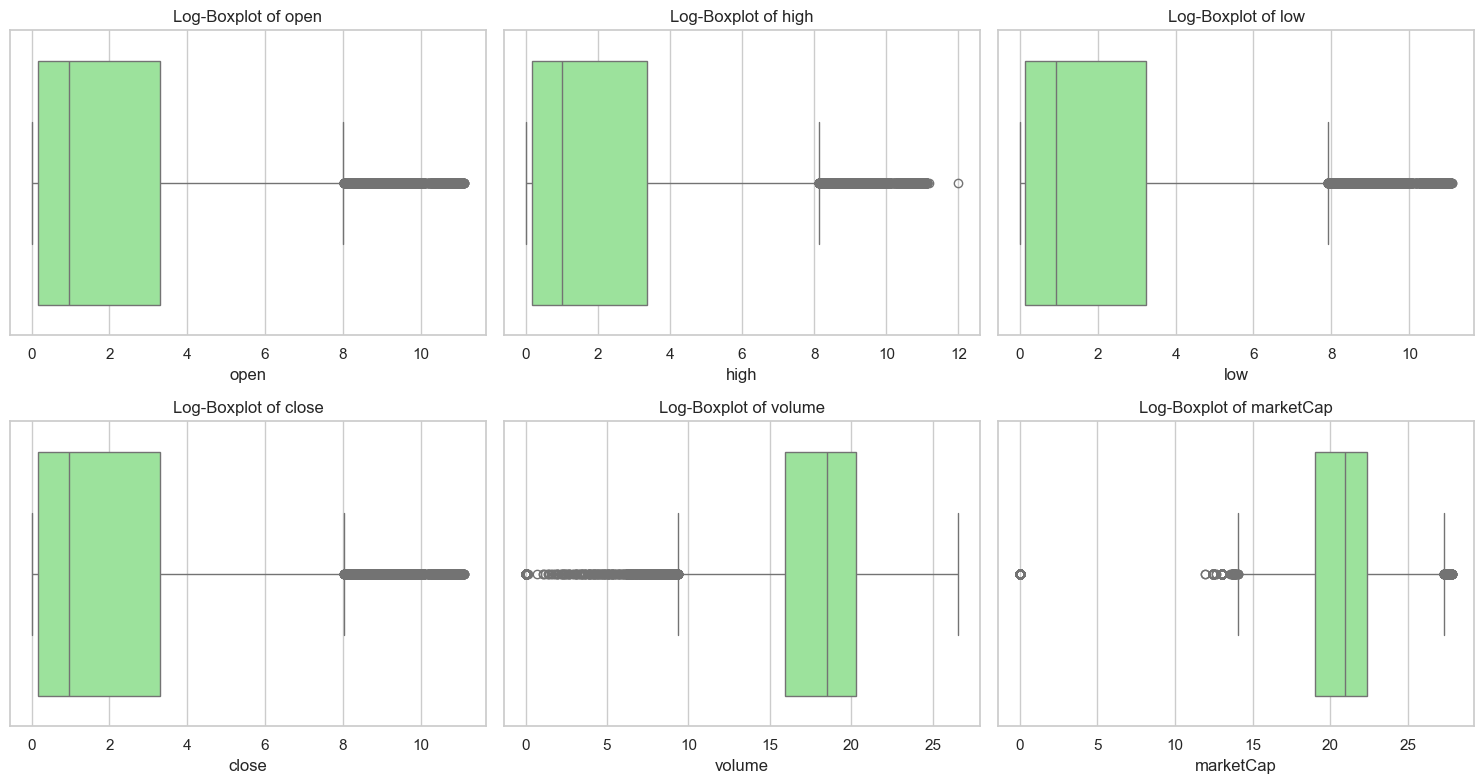

In [111]:
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=np.log1p(df[col]), color="lightgreen")
    plt.title(f"Log-Boxplot of {col}")
plt.tight_layout()
plt.show()


- **After log transformation, the boxplots show a much more compressed range with fewer extreme outliers. This highlights how log scaling stabilizes variance and makes the data more suitable for machine learning models.**

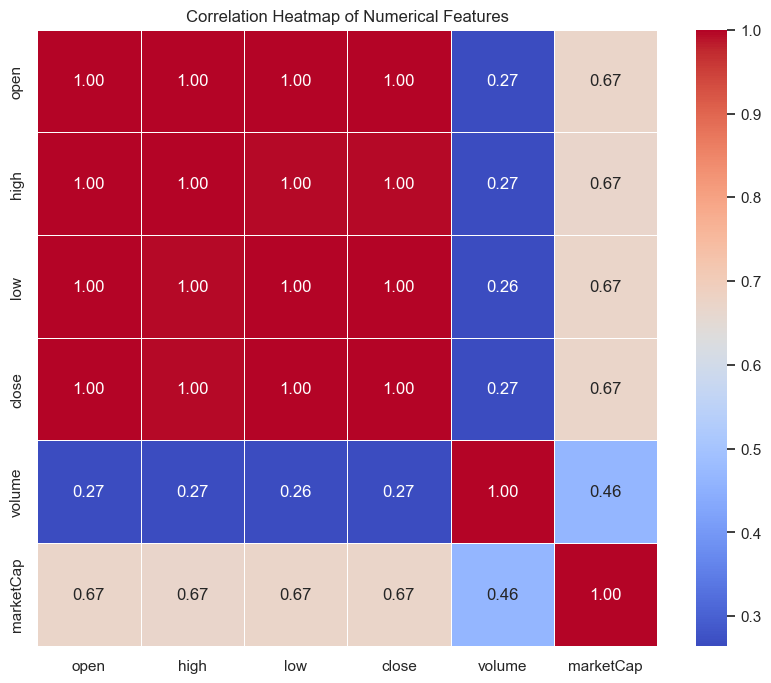

In [112]:
# Compute correlation only on numerical columns
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


#### Interpretation (Correlation + Heatmap)
- The correlation heatmap shows very strong positive correlations among the price-related variables (open, high, low, close), which is expected since they move together in financial time series.
- marketCap also shows strong correlation with price variables, reflecting the fact that market capitalization is directly derived from price × circulating supply.
- On the other hand, volume exhibits weaker correlation with prices, indicating that trading activity does not always move in tandem with price changes.
- This suggests that while price features may carry redundant information, volume provides complementary insights into market activity.

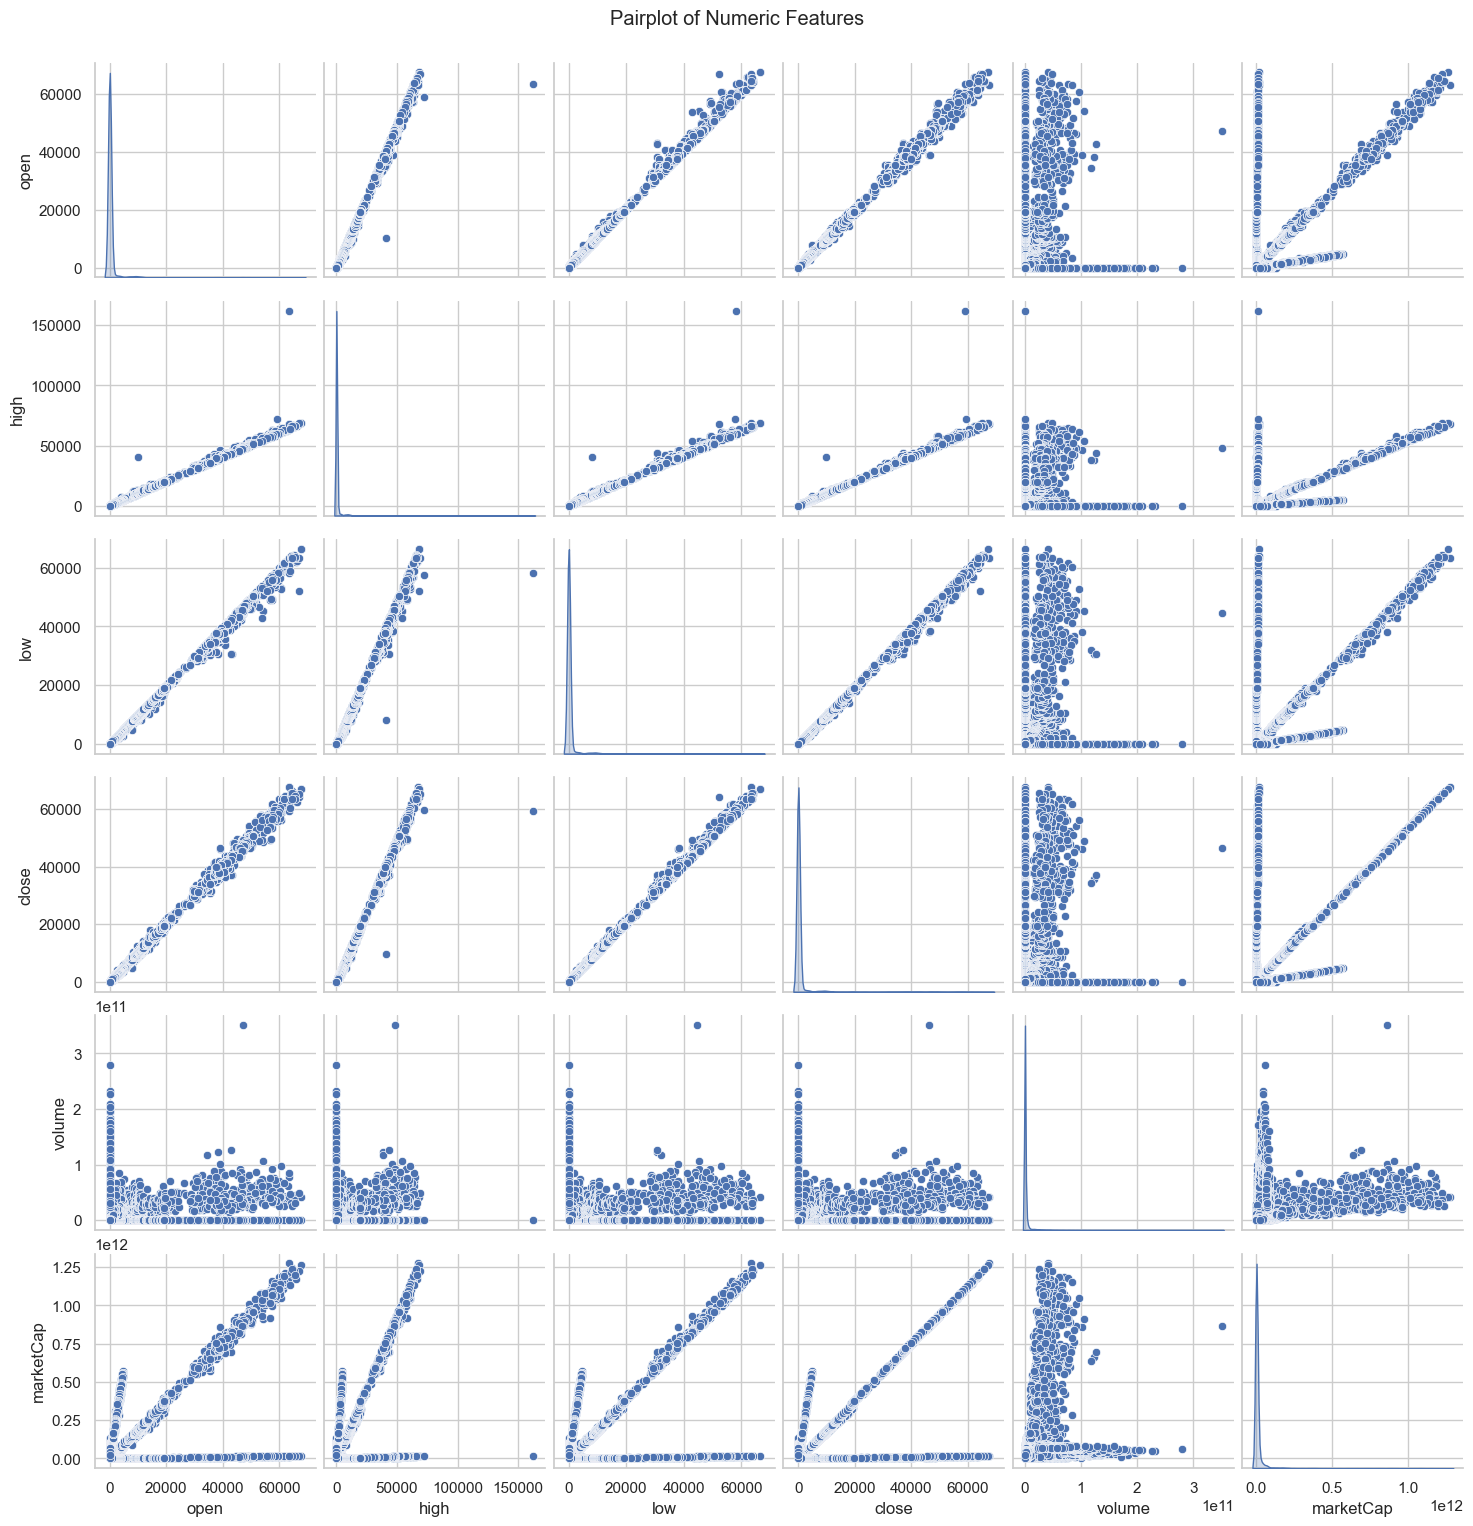

In [114]:

# 2. Pairplot for detailed relationships (optional, heavy for large data)
sns.pairplot(crypto[['open', 'high', 'low', 'close', 'volume', 'marketCap']], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric columns for VIF
X_vif = df[num_cols].dropna()

# Add constant (required for VIF calculation)
X_vif_const = add_constant(X_vif)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i)
                   for i in range(X_vif_const.shape[1])]

print(vif_data)




     Feature          VIF
0      const     0.000000
1       open  1008.937333
2       high   189.849382
3        low  1642.439129
4      close  1326.697126
5     volume     1.287484
6  marketCap     2.165563


#### Interpretation 
- The VIF values for open, high, low, and close are extremely high (>1000), indicating strong multicollinearity. This is expected in financial data since these price variables move together.
- For tree-based models (Random Forest, XGBoost), multicollinearity is not a concern, so we retain all features.
- However, for linear models, we may consider using only one representative feature (e.g., close) to avoid unstable coefficients.

# 📌 EDA Conclusion & Insights

Based on the exploratory data analysis, we can summarize the following key points:

### 1. Dataset Overview
- The dataset contains **historical OHLCV data** (Open, High, Low, Close, Volume, Market Cap) for multiple cryptocurrencies.  
- Total features after feature engineering: **19** (including log returns, moving averages, rolling volatility, ATR, liquidity, etc.).  
- Target variable: **7-day forward volatility (`vol_7d_target_next`)**.  

---

### 2. Categorical Variable (`crypto_name`)
- The dataset includes multiple cryptocurrencies.  
- Distribution is **imbalanced**, with **Bitcoin and Ethereum dominating** the dataset.  
- This reflects real-world market dominance, but smaller cryptos may provide less stable patterns.  

---

### 3. Numerical Variables
- Price-related features (`open`, `high`, `low`, `close`) and `marketCap` show **heavy right-skewness** in raw form.  
- Log transformations significantly improved the distributions, making them more balanced and model-friendly.  
- Boxplots revealed many outliers, but these represent **genuine market events** (bull runs, crashes, sudden spikes in volume) and should not be removed.  

---

### 4. Correlation & Multicollinearity
- Strong positive correlations exist among `open`, `high`, `low`, and `close`, as expected.  
- VIF analysis confirmed **very high multicollinearity** among price features (VIF > 1000).  
- This is expected in financial time-series data.  
- For tree-based models (Random Forest, XGBoost), this is **not an issue**.  
- For linear models, we may consider retaining only one representative price feature (e.g., `close`).  

---

### 5. Preprocessing Requirements
- **Categorical variable (`crypto_name`)** → requires encoding (one-hot encoding).  
- **Numerical variables** → may require scaling/normalization (especially for linear models, not strictly for tree-based).  
- **Outliers** → kept, since they reflect true market volatility.  

---


In [52]:
crypto.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')

In [ ]:

# correct relative path (from inside notebooks/)
features = pd.read_csv("../artifacts/crypto_features_model.csv")

features.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,log_price,log_return,vol_7d,vol_30d,ma_7,ma_30,liquidity,tr,atr_14,vol_7d_target_next
0,44826,52.675035,55.112358,49.787900,53.219243,0.000000e+00,8.912813e+07,2020-10-05 23:59:59.999000+00:00,Aave,2020-10-05,3.993036,0.010088,2.063880,2.063880,39.890584,39.890584,0.000000,5.324459,18.752941,1.827595
1,44843,53.291969,53.402270,40.734578,42.401599,5.830915e+05,7.101144e+07,2020-10-06 23:59:59.999000+00:00,Aave,2020-10-06,3.770496,-0.222540,1.827595,1.827595,40.392787,40.392787,0.008211,12.667692,17.535891,1.632393
2,44901,42.399947,42.408314,35.970690,40.083976,6.828342e+05,6.713004e+07,2020-10-07 23:59:59.999000+00:00,Aave,2020-10-07,3.715618,-0.054878,1.632393,1.632393,40.341319,40.341319,0.010172,6.437624,15.686180,1.478744
3,44938,39.885262,44.902511,36.696057,43.764463,1.658817e+06,2.202651e+08,2020-10-08 23:59:59.999000+00:00,Aave,2020-10-08,3.801415,0.085796,1.478744,1.478744,40.830339,40.830339,0.007531,8.206454,14.617648,1.362972
4,45010,43.764463,47.569533,43.291776,46.817744,8.155377e+05,2.356322e+08,2020-10-09 23:59:59.999000+00:00,Aave,2020-10-09,3.867397,0.065982,1.362972,1.362972,47.444792,41.578765,0.003461,4.277757,13.325161,0.104736


In [60]:
crypto.columns.nunique(), features.columns.nunique()

(9, 20)